## **Práctica 16: Clasificación múltiple**

Nombre: 
* Diana Celeste Herrera Godina
* Alan Francisco Mora González

No. Cuenta: 
* 316161927
* 113005901

Email: 
* dayanceles@gmail.com
* alanfmorag@gmail.com

### **Caso de estudio.**

**Objetivo.** 

Clasificar los exámenes de cardiotocograma que fueron clasificados en tres clases: Normal, Sospecha y Patológico.


**Contexto.**

Imagina que eres un investigador médico que recopila datos para un estudio. Ha recopilado datos sobre un conjunto de pacientes, todos los cuales sufrían de la misma enfermedad. Durante el curso de su tratamiento, cada paciente respondió a uno de los 5 medicamentos, Medicamento A, Medicamento B, Medicamento c, Medicamento x e y.

Parte de su trabajo es construir un modelo para averiguar qué medicamento podría ser apropiado para un futuro paciente con la misma enfermedad. Las características de este conjunto de datos son la edad, el sexo, la presión arterial y el colesterol de los pacientes, y el objetivo es el medicamento al que respondió cada paciente.

Es un ejemplo de clasificador multiclase y puede usar la parte de entrenamiento del conjunto de datos para crear un árbol de decisión y, a continuación, usarlo para predecir la clase de un paciente desconocido o para prescribir un medicamento a un nuevo paciente.


**Datos.**

El conjunto de datos contiene 200 registros de características, que luego fueron clasificados por expertos en 5 clases:

1) Drug A  
2) Drug B  
3) Drug C  
4) Drug X  
5) Drug Y  


**Fuente de datos:**

https://www.kaggle.com/datasets/pablomgomez21/drugs-a-b-c-x-y-for-decision-trees


**Variables:**

* 1) Age: Edad del paciente.
* 2) Sex: Sexo del paciente.
* 3) BP: Presión sanguínea.
* 4) Cholesterol: Nivel de colesterol.
* 5) Na_to_K: Sodio - Potasio.
* 6) Drug: Medicamento que funcionó con ese paciente.

In [1]:
import pandas as pd               # Para la manipulación y análisis de datos
import numpy as np                # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt   # Para la generación de gráficas a partir de los datos
import seaborn as sns             # Para la visualización de datos basado en matplotlib
%matplotlib inline

In [55]:
url = "https://raw.githubusercontent.com/alanmgg/Data-Mining/main/Datos/drug.csv"
data_drug = pd.read_csv(url)
data_drug

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


Aplicando ingeniería de datos para poder manipularlos más adelante.

In [60]:
# Sexo del paciente
data_drug.loc[data_drug['Sex'] == 'F', 'Sex'] = 1.0
data_drug.loc[data_drug['Sex'] == 'M', 'Sex'] = 2.0
# Presión sanguinea
data_drug.loc[data_drug['BP'] == 'LOW', 'BP'] = 1.0
data_drug.loc[data_drug['BP'] == 'NORMAL', 'BP'] = 2.0
data_drug.loc[data_drug['BP'] == 'HIGH', 'BP'] = 3.0
# Nivel del colesterol
data_drug.loc[data_drug['Cholesterol'] == 'NORMAL', 'Cholesterol'] = 1.0
data_drug.loc[data_drug['Cholesterol'] == 'HIGH', 'Cholesterol'] = 2.0
# Medicamento que funciono con ese paciente
data_drug.loc[data_drug['Drug'] == 'drugA', 'Drug'] = 1.0
data_drug.loc[data_drug['Drug'] == 'drugB', 'Drug'] = 2.0
data_drug.loc[data_drug['Drug'] == 'drugC', 'Drug'] = 3.0
data_drug.loc[data_drug['Drug'] == 'drugX', 'Drug'] = 4.0
data_drug.loc[data_drug['Drug'] == 'drugY', 'Drug'] = 5.0
# Convertir la columna en tipo float
data_drug['Sex'] = data_drug['Sex'].astype(float)
data_drug['BP'] = data_drug['BP'].astype(float)
data_drug['Cholesterol'] = data_drug['Cholesterol'].astype(float)
data_drug['Drug'] = data_drug['Drug'].astype(float)

data_drug

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1.0,3.0,2.0,25.355,5.0
1,47,2.0,1.0,2.0,13.093,3.0
2,47,2.0,1.0,2.0,10.114,3.0
3,28,1.0,2.0,2.0,7.798,4.0
4,61,1.0,1.0,2.0,18.043,5.0
...,...,...,...,...,...,...
195,56,1.0,1.0,2.0,11.567,3.0
196,16,2.0,1.0,2.0,12.006,3.0
197,52,2.0,2.0,2.0,9.894,4.0
198,23,2.0,2.0,1.0,14.020,4.0


In [61]:
data_drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    float64
 2   BP           200 non-null    float64
 3   Cholesterol  200 non-null    float64
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 9.5 KB


In [62]:
print(data_drug.groupby('Drug').size())

Drug
1.0    23
2.0    16
3.0    16
4.0    54
5.0    91
dtype: int64


In [63]:
data_drug.describe()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,44.315000,1.520000,2.065000,1.515000,16.084485,3.870000
std,16.544315,0.500854,0.839224,0.501029,7.223956,1.372047
min,15.000000,1.000000,1.000000,1.000000,6.269000,1.000000
25%,31.000000,1.000000,1.000000,1.000000,10.445500,3.000000
50%,45.000000,2.000000,2.000000,2.000000,13.936500,4.000000
75%,58.000000,2.000000,3.000000,2.000000,19.380000,5.000000
max,74.000000,2.000000,3.000000,2.000000,38.247000,5.000000


#### **2) Selección de características**

A través de un mapa de calor de identifican posibles variables correlacionadas.

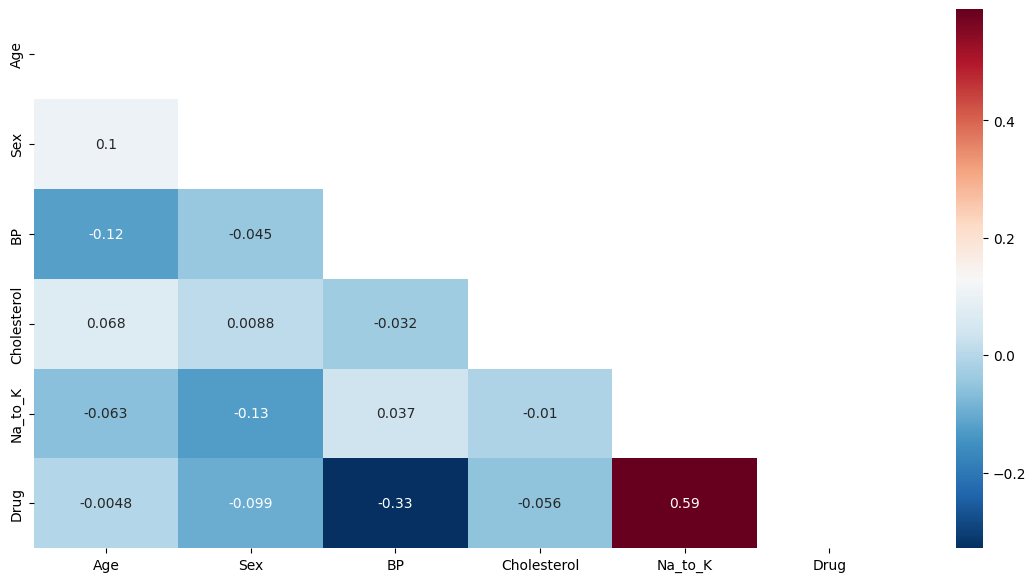

In [64]:
plt.figure(figsize=(14,7))
matriz_inf = np.triu(data_drug.corr())
sns.heatmap(data_drug.corr(), cmap='RdBu_r', annot=True, mask=matriz_inf)
plt.show()

**Varibles seleccionadas:**

Debido a la importancia de las variables, se considerarán todas las variables para la construcción de los modelos.

#### **3) Definición de las variables predictoras y variable clase**

In [65]:
# Variables predictoras
x = np.array(data_drug[['Age',
                          'Sex',
                          'BP',
                          'Cholesterol',
                          'Na_to_K']])
pd.DataFrame(x)

,0,1,2,3,4
0,23.0,1.0,3.0,2.0,25.355
1,47.0,2.0,1.0,2.0,13.093
2,47.0,2.0,1.0,2.0,10.114
3,28.0,1.0,2.0,2.0,7.798
4,61.0,1.0,1.0,2.0,18.043
...,...,...,...,...,...
195,56.0,1.0,1.0,2.0,11.567
196,16.0,2.0,1.0,2.0,12.006
197,52.0,2.0,2.0,2.0,9.894
198,23.0,2.0,2.0,1.0,14.020


In [66]:
# Variable clase
y = np.array(data_drug[['Drug']])
pd.DataFrame(y)

,0
0,5.0
1,3.0
2,3.0
3,4.0
4,5.0
...,...
195,3.0
196,3.0
197,4.0
198,4.0


### **II. Creación de los modelos**

In [21]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [67]:
x_train, x_validation, y_train, y_validation = model_selection.train_test_split(x, y, 
                                                                                test_size = 0.2, 
                                                                                random_state = 0,
                                                                                shuffle = True)

In [52]:
print(len(x_train))
print(len(x_validation))

print(len(y_train))
print(len(y_validation))

160
40
160
40


### **Modelo 1: Árboles de decisión (AD)**

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
# Se entrena el modelo a partir de los datos de entrada
clasificacion_ad = DecisionTreeClassifier(random_state=0)
clasificacion_ad.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [69]:
# Clasificación final 
y_clasificacion_ad = clasificacion_ad.predict(x_validation)
print(y_clasificacion_ad)

[3. 4. 5. 5. 5. 4. 4. 4. 5. 4. 1. 5. 5. 5. 2. 3. 5. 5. 4. 5. 5. 4. 4. 4.
 5. 5. 5. 5. 5. 4. 4. 3. 1. 4. 5. 5. 4. 5. 1. 4.]


In [70]:
valores_mod_1 = pd.DataFrame(y_validation, y_clasificacion_ad)
valores_mod_1

,0
3.0,3.0
4.0,4.0
5.0,5.0
5.0,5.0
5.0,5.0
4.0,4.0
4.0,4.0
4.0,4.0
5.0,5.0
4.0,4.0


In [71]:
accuracy_score(y_validation, y_clasificacion_ad)

1.0

#### **Matriz de clasificación: Árbol de decisión**

In [72]:
# Matriz de clasificación
modelo_clasificacion_1 = clasificacion_ad.predict(x_validation)
matriz_clasificacion_1 = pd.crosstab(y_validation.ravel(), 
                                   modelo_clasificacion_1, 
                                   rownames=['Actual'], 
                                   colnames=['Clasificación']) 
matriz_clasificacion_1

Clasificación,1.0,2.0,3.0,4.0,5.0
Actual,,,,,
1.0,3,0,0,0,0
2.0,0,1,0,0,0
3.0,0,0,3,0,0
4.0,0,0,0,14,0
5.0,0,0,0,0,19


In [73]:
#Reporte de la clasificación
print('Criterio: \n', clasificacion_ad.criterion)
print('Importancia variables: \n', clasificacion_ad.feature_importances_)
print("Exactitud:", accuracy_score(y_validation, y_clasificacion_ad))
print(classification_report(y_validation, y_clasificacion_ad))

Criterio: 
 gini
Importancia variables: 
 [0.15219494 0.         0.27213492 0.11541449 0.46025565]
Exactitud: 1.0
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         3
         2.0       1.00      1.00      1.00         1
         3.0       1.00      1.00      1.00         3
         4.0       1.00      1.00      1.00        14
         5.0       1.00      1.00      1.00        19

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [74]:
importancia_mod_1 = pd.DataFrame({'Variable': list(data_drug[['Age',
                                                              'Sex',
                                                              'BP',
                                                              'Cholesterol',
                                                              'Na_to_K']]),
                                'Importancia': clasificacion_ad.feature_importances_}).sort_values('Importancia', ascending=False)
importancia_mod_1

,Variable,Importancia
4,Na_to_K,0.460256
2,BP,0.272135
0,Age,0.152195
3,Cholesterol,0.115414
1,Sex,0.000000


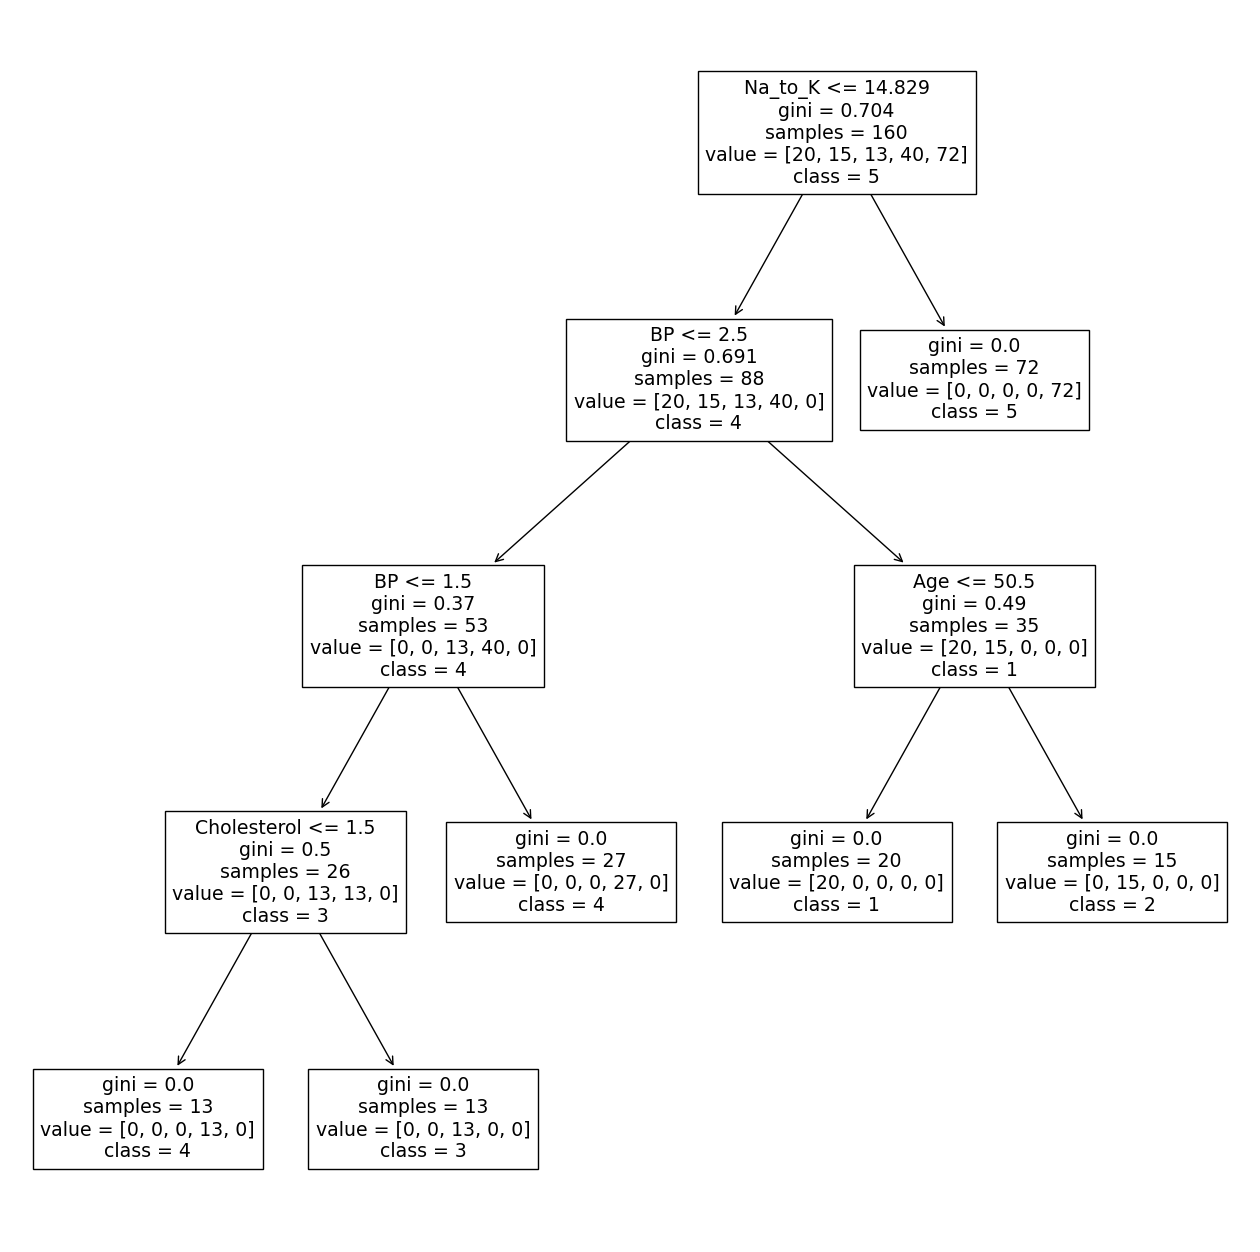

In [76]:
from sklearn.tree import plot_tree
plt.figure(figsize=(16,16))  
plot_tree(clasificacion_ad, 
          feature_names = ['Age',
                          'Sex',
                          'BP',
                          'Cholesterol',
                          'Na_to_K'],
         class_names = ['1', '2', '3', '4', '5'])
plt.show()

In [77]:
from sklearn.tree import export_text
reporte = export_text(clasificacion_ad, feature_names = ['Age',
                                                        'Sex',
                                                        'BP',
                                                        'Cholesterol',
                                                        'Na_to_K'])
print(reporte)

|--- Na_to_K <= 14.83
|   |--- BP <= 2.50
|   |   |--- BP <= 1.50
|   |   |   |--- Cholesterol <= 1.50
|   |   |   |   |--- class: 4.0
|   |   |   |--- Cholesterol >  1.50
|   |   |   |   |--- class: 3.0
|   |   |--- BP >  1.50
|   |   |   |--- class: 4.0
|   |--- BP >  2.50
|   |   |--- Age <= 50.50
|   |   |   |--- class: 1.0
|   |   |--- Age >  50.50
|   |   |   |--- class: 2.0
|--- Na_to_K >  14.83
|   |--- class: 5.0



### **Modelo 2: Bosques aleatorios (BA)**

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
clasificacion_ba = RandomForestClassifier(random_state=0)
clasificacion_ba.fit(x_train, y_train)

<ipython-input-79-39f78c878592>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clasificacion_ba.fit(x_train, y_train)


RandomForestClassifier(random_state=0)

In [80]:
# Clasificación final 
y_clasificacion_ba = clasificacion_ba.predict(x_validation)
print(y_clasificacion_ba)

[3. 4. 5. 5. 5. 4. 4. 4. 5. 4. 1. 5. 5. 5. 2. 3. 5. 5. 4. 5. 5. 4. 4. 4.
 5. 5. 5. 5. 5. 4. 4. 3. 1. 4. 5. 5. 4. 5. 1. 4.]


In [81]:
valores_mod_2 = pd.DataFrame(y_validation, y_clasificacion_ba)
valores_mod_2

,0
3.0,3.0
4.0,4.0
5.0,5.0
5.0,5.0
5.0,5.0
4.0,4.0
4.0,4.0
4.0,4.0
5.0,5.0
4.0,4.0


In [82]:
accuracy_score(y_validation, y_clasificacion_ba)

1.0

#### **Matriz de clasificación: Bosques aleatorios**

In [83]:
# Matriz de clasificación
modelo_clasificacion_2 = clasificacion_ba.predict(x_validation)
matriz_clasificacion_2 = pd.crosstab(y_validation.ravel(),
                                    modelo_clasificacion_2,
                                    rownames=['Reales'],
                                    colnames=['Clasificación']) 
matriz_clasificacion_2

Clasificación,1.0,2.0,3.0,4.0,5.0
Reales,,,,,
1.0,3,0,0,0,0
2.0,0,1,0,0,0
3.0,0,0,3,0,0
4.0,0,0,0,14,0
5.0,0,0,0,0,19


In [84]:
# Reporte de la clasificación
print('Criterio: \n', clasificacion_ba.criterion)
print('Importancia variables: \n', clasificacion_ba.feature_importances_)
print("Exactitud:", accuracy_score(y_validation, y_clasificacion_ba))
print(classification_report(y_validation, y_clasificacion_ba))

Criterio: 
 gini
Importancia variables: 
 [0.15624993 0.01302102 0.23317381 0.05537592 0.54217932]
Exactitud: 1.0
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         3
         2.0       1.00      1.00      1.00         1
         3.0       1.00      1.00      1.00         3
         4.0       1.00      1.00      1.00        14
         5.0       1.00      1.00      1.00        19

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [85]:
importancia_mod_2 = pd.DataFrame({'Variable': list(data_drug[['Age',
                                                          'Sex',
                                                          'BP',
                                                          'Cholesterol',
                                                          'Na_to_K']]), 
                             'Importancia': clasificacion_ba.feature_importances_}).sort_values('Importancia', ascending=False)
importancia_mod_2

,Variable,Importancia
4,Na_to_K,0.542179
2,BP,0.233174
0,Age,0.156250
3,Cholesterol,0.055376
1,Sex,0.013021


### **III. Validación**

In [86]:
print("Árbol de decisión:", accuracy_score(y_validation, y_clasificacion_ad))
print("Bosque aleatorio:", accuracy_score(y_validation, y_clasificacion_ba))

Árbol de decisión: 1.0
Bosque aleatorio: 1.0


In [88]:
# Rendimiento
from sklearn.preprocessing import label_binarize
y_score = clasificacion_ba.predict_proba(x_validation)
y_test_bin = label_binarize(y_validation, classes=[1, 
                                                   2, 
                                                   3,
                                                   4,
                                                   5])
n_classes = y_test_bin.shape[1]

AUC para la clase 1: 1.0
AUC para la clase 2: 1.0
AUC para la clase 3: 1.0
AUC para la clase 4: 1.0
AUC para la clase 5: 1.0


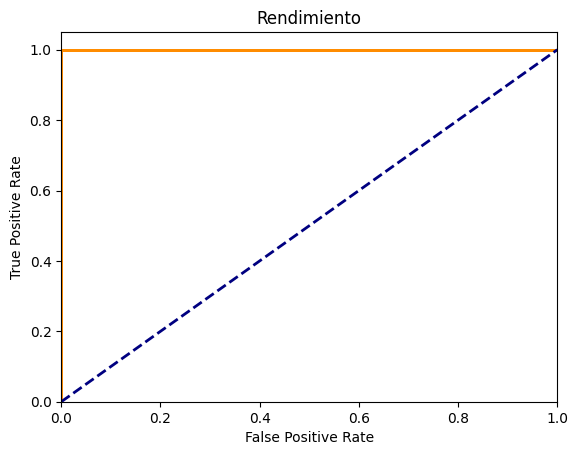

In [89]:
# Se calcula la curva ROC y el área bajo la curva para cada clase
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
  plt.plot(fpr[i], tpr[i], color='darkorange', lw=2)
  print('AUC para la clase {}: {}'.format(i+1, auc(fpr[i], tpr[i])))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Rendimiento')
plt.show()

### **IV. Nuevas clasificaciones**

In [91]:
# Paciente
paciente = pd.DataFrame({'Age': [26],
                         'Sex': [1.0],
                         'BP': [2.0],
                         'Cholesterol': [1.0],
                         'Na_to_K': [18.043]})
clasificacion_ba.predict(paciente)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([5.])